In [3]:
import warnings
warnings.filterwarnings("ignore")

# Data, Correlation, & Fitting Data

## Bivariate Data

As the name implies, bivariate data is data that consists of two variables. We compare and analyze the two variables with respect to one another in order to attempt to find and/or explain the relationship between them. It is also possible that one of these variables depends on the other, in which case we have an independent variable and a dependent variable.

* altitude and air density
* ice cream sales and temperature throughout a day
* mana cost of a MTG card and the turns remaining in a game

When we have bivariate data, there are some simple things we can do to help us understand what sort of relationship our variables have with one another. We want to be able to visualize our data as well as visualize the relationship (if there is one) and quantify it. We can use a combination of `pandas`, `numpy`, and `matplotlib`/`seaborn`/`bokeh` to handle the analysis and visualization.

### Simple Example

First let's consider data from the *U.S. Standard Atmostphere 1976*. We simply want to look at how the density of air changes as we move higher into the atmosphere. In our simple data set (a full one has been provided) consists of altitudes in meters and densities in kilograms per meters cubed.

The original data and model can be found in its original form, provided by NASA [here](https://ntrs.nasa.gov/api/citations/19770009539/downloads/19770009539.pdf). We however are using a stripped down version sourced from [here](https://www.engineeringtoolbox.com/standard-atmosphere-d_604.html).

In [4]:
import pandas as pd
atmos = pd.read_csv('data/atmosphere_simple.csv')
atmos

,altitude,air_density
0,-1000,1.347000
1,0,1.225000
2,1000,1.112000
3,2000,1.007000
4,3000,0.909300
5,4000,0.819400
6,5000,0.736400
7,6000,0.660100
8,7000,0.590000
9,8000,0.525800


### We used the line and scatter plot to show the curvature.
### We could have used the scatter only but with line it looks better 

In [5]:
import hvplot.pandas
# general note on hvPlot vs Holoviews - usually we will create a plot using hvPlot when we have a dataframe,
# and then use Holoviews to manipulate and compose it.

(atmos.hvplot.line(x='altitude', y='air_density') * atmos.hvplot.scatter(x='altitude', y='air_density')).opts(
    xlabel='Altitude (m)',
    ylabel='Density of Air ($kg/m^{3}$)',
    title='U.S. Standard Atmosphere, Altitude vs. Density of Air',
    xlim=(-5000, 85000),
    height=480,
    show_grid=True
)


:Overlay
   .Curve.I   :Curve   [altitude]   (air_density)
   .Scatter.I :Scatter   [altitude]   (air_density)

We can see that there is a pretty strong relationship between these two variables (in the direction that we expect - at higher altitudes air is much thinner!). We can see too that this relationship is non-linear - air density rapidly decreases as we ascend to about 20km in altitude. It seems to asymtotically approach a density of 0 as we continue upward (in reality it is not asymtotic, as it is around 100000m (100km), that atmospheric pressue, and thus the density of air, becomes 0).

You may ask why did we plot altitude on the x-axis, when it makes more sense to represent it vertically? The answer is actually very simple: altitude in an indepenent variable in this context! The graph above tells us that as the altitude increases, the density of air decreases. Let's flip it and see what it loops like: 

In [6]:
(atmos.hvplot.line(x='air_density', y='altitude') * atmos.hvplot.scatter(x='air_density', y='altitude')).opts(
    xlabel='Density of Air ($kg/m^{3}$)',
    ylabel='Altitude (m)',
    title='U.S. Standard Atmosphere, Density of Air vs. Altitude',
    xlim=(-0.1, 1.4),
    height=480,
    show_grid=True
)

:Overlay
   .Curve.I   :Curve   [air_density]   (altitude)
   .Scatter.I :Scatter   [air_density]   (altitude)

This swapped ordering is still technically valid as it still shows how the data is related, but now indicates that the changes in alitude are caused by changes in air density (which is not true!). We need to take care when selecting what data goes on specific axes.

## Multivariate Data

As the name implies, multivariate data is data that consists of more than two variables. The idea is the same as it is with bivariate data, except we have more variables to work with.

### Simple Example

Again let's consider data from the *U.S. Standard Atmostphere 1976*.

The original data and model can be found in its original form, provided by NASA [here](https://ntrs.nasa.gov/api/citations/19770009539/downloads/19770009539.pdf). We however are using a stripped down version sourced from [here](https://www.engineeringtoolbox.com/standard-atmosphere-d_604.html).

In [7]:
import pandas as pd
atmos = pd.read_csv('data/atmosphere.csv')
atmos

,altitude,temperature,gravity,atmospheric_pressure,air_density,dynamic_viscosity
0,-1000,21.50,9.810,11.390000,1.347000,1.821
1,0,15.00,9.807,10.130000,1.225000,1.789
2,1000,8.50,9.804,8.988000,1.112000,1.758
3,2000,2.00,9.801,7.950000,1.007000,1.726
4,3000,-4.49,9.797,7.012000,0.909300,1.694
5,4000,-10.98,9.794,6.166000,0.819400,1.661
6,5000,-17.47,9.791,5.405000,0.736400,1.628
7,6000,-23.96,9.788,4.722000,0.660100,1.595
8,7000,-30.45,9.785,4.111000,0.590000,1.561
9,8000,-36.94,9.782,3.565000,0.525800,1.527


We can look at any two variables with respect to altitude (our independent variable!):

### Here we are using a dictionary called plot_axis which has the dictionary with the names of the axis 

In [8]:
import hvplot.pandas

# it can get annoying to repeat a lot of common parameters when creating overlays; we can put such common
# parameters in a dictionary, and then expand that dictionary whenever we want to use those parameters in
# a function call
plot_axes = {
    'x': 'altitude',
    'y': 'atmospheric_pressure',
}

altitude_vs_pressure = atmos.hvplot.line(**plot_axes) * atmos.hvplot.scatter(**plot_axes)

altitude_vs_pressure.opts(
    xlabel='Altitude (m)',
    ylabel='Atmospheric Pressure ($$10^{-5}N s/m^{2}$$)',
    title='Altitude vs. Atmospheric Pressure',
    xlim=(-5000, 85000),
    height=480,
    show_grid=True
)

:Overlay
   .Curve.I   :Curve   [altitude]   (atmospheric_pressure)
   .Scatter.I :Scatter   [altitude]   (atmospheric_pressure)

In [9]:
plot_axes = {
    'x': 'altitude',
    'y': 'temperature',
}

altitude_vs_temperature = atmos.hvplot.line(**plot_axes) * atmos.hvplot.scatter(**plot_axes)

altitude_vs_temperature.opts(
    xlabel='Altitude (m)',
    ylabel='Temeprature ($^{\circ}C$)',
    title='Altitude vs. Temperature',
    xlim=(-5000, 85000),
    height=480,
    show_grid=True    
)

:Overlay
   .Curve.I   :Curve   [altitude]   (temperature)
   .Scatter.I :Scatter   [altitude]   (temperature)

In [10]:
# We can see that at Altitude 45000 m we can see that the temp increase after reducing and then icnreases. 
# This is because of the Ozone layer 


Or we can plot them simulataneously on the same figure

In [23]:
plot_axes = {
    'x': 'altitude',
    'y': ['atmospheric_pressure', 'temperature'],
}

altitude_vs_pressure_and_temperature = atmos.hvplot.line(**plot_axes) * atmos.hvplot.scatter(**plot_axes)

altitude_vs_pressure_and_temperature.opts(
    xlabel='Altitude (m)',
    title='Altitude vs. Atmospheric Pressure & Temperature',
    xlim=(-5000, 85000),
    height=480,
    show_grid=True,
    # multi_y=True 
)

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [altitude]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Scatter   [altitude]   (value)

The problem with setting both of these variables on the same plot is that numerically they are within very different ranges of values. Temperature fluctuates from 20 down to nearly -80, and our density only ranges from a little over 10.0 to nearly 0.0.

There are different ways to handle this, but ideally we can just use a separate y-axis on the right side of our plot. There is only light support of this outside of `matplotlib`, but we can make it work. THe biggest problem is that we need to compose the plots slightly more granuarly to ensure that enabling the twin-axis works properly.

In [24]:
# compose the first plot
plot_axes = {
    'x': 'altitude',
    'y': 'atmospheric_pressure',
}
altitude_vs_pressure = atmos.hvplot.line(**plot_axes) * atmos.hvplot.scatter(**plot_axes)

# compose the second plot
plot_axes = {
    'x': 'altitude',
    'y': 'temperature',
}
altitude_vs_temperature = atmos.hvplot.line(**plot_axes) * atmos.hvplot.scatter(**plot_axes)

# compoose everything together, and enable the twin-axis using the `multi_y` parameter
(altitude_vs_temperature * altitude_vs_pressure).opts(
    xlabel='Altitude (m)',
    title='Altitude vs. Atmospheric Pressure & Temperature',
    xlim=(-5000, 85000),
    height=480,
    show_grid=True,
    multi_y=True    # THIS LINE IS THE ONE THAT SEPRATES THE TWO X AXIS> 
)

:Overlay
   .Curve.I    :Curve   [altitude]   (temperature)
   .Scatter.I  :Scatter   [altitude]   (temperature)
   .Curve.II   :Curve   [altitude]   (atmospheric_pressure)
   .Scatter.II :Scatter   [altitude]   (atmospheric_pressure)

#### IN the below graphs we added a size variable with dynamic_viscosity. s = dynamic_viscosity. 
#### Doing so, we are adding a new variable to show. 
#### We also used the dim function to increase the power

Now we can see both data sets in better detail (specifically atmospheric pressure), as temperature is added to a secondary axis. This allows us to avoid visually squashing the pressure data. Throwing more data into this plot however would not work well, as we cannot add any more axes, and everything at varying scales becomes unmaintainable. A this point we would defer to composing multiple plots in a typcal layout without any overlays. We could also relay on using colors and size (as we have seen before) for representing multiple variables.

In [42]:
import holoviews as hv

# compose the first plot, 
plot_axes = {
    'x': 'altitude',
    'y': 'atmospheric_pressure'
}
altitude_vs_pressure = atmos.hvplot.line(**plot_axes) * atmos.hvplot.scatter(**plot_axes, s='dynamic_viscosity').opts(size=hv.dim('dynamic_viscosity')**4)

# compose the second plot
plot_axes = {
    'x': 'altitude',
    'y': 'temperature',
}
altitude_vs_temperature = atmos.hvplot.line(**plot_axes) * atmos.hvplot.scatter(**plot_axes,s='dynamic_viscosity' ).opts(size=hv.dim('dynamic_viscosity')**4)

# compoose everything together, and enable the twin-axis using the `multi_y` parameter
(altitude_vs_temperature * altitude_vs_pressure).opts(
    xlabel='Altitude (m)',
    title='Altitude vs. Atmospheric Pressure & Temperature',
    xlim=(-5000, 85000),
    height=480,
    show_grid=True,
    multi_y=True
)

:Overlay
   .Curve.I    :Curve   [altitude]   (temperature)
   .Scatter.I  :Scatter   [altitude]   (temperature,dynamic_viscosity)
   .Curve.II   :Curve   [altitude]   (atmospheric_pressure)
   .Scatter.II :Scatter   [altitude]   (atmospheric_pressure,dynamic_viscosity)

In [32]:
import numpy as np 
r = np.corrcoef(atmos.atmospheric_pressure, atmos.altitude)
r
# atmos.columns
# It only tells us they are related or not. 
# If it is related it is not necessary that they are related

array([[ 1.        , -0.74442076],
       [-0.74442076,  1.        ]])

There are many ways for us to work with and visualize multivariate data, but it is highly dependent on the data. Data that consists of clusters of data can be visualized using methods like parallel coordinate/Andrews Curves; data that consists of categorical data may be representable with a radar plot; and sometimes the data just needs to be manipulated in ways to reduce what an analyst is looking at. We will soon be looking in more detail on how to cluster and group data, especially when working with data that is not directly categorical.

## Correlation & (Linear) Fitting

When working with more than one variable we can use various methods to quantify how well the variables correlate with one another. We meaure the correlation between two metrics using a scalar value inclusively between -1 and 1. This value is known as the *correlation coefficient*; values near +1 indicate a strong positive relation, values near -1 indicate a strong negative relation (inversely correlated), and values near or equal to 0 indicate weak or no relation.

### Pearson's Correlation Coefficient

This is the most commonly used correlation coefficient. It is simple to compute, and for us, as users of `numpy`, it is even easier (it is literally just a function call!).

$$
r = \frac{
        n\Sigma{xy}-(\Sigma{x})(\Sigma{y})
    }{
        [\sqrt{n\Sigma{x^{2}}-(\Sigma{x})^{2}][n\Sigma{y^{2}}-(\Sigma{y})^{2}}]
    }
$$

where `r` is our correlation coefficient, `x` and `y` are our data, and `n` is the sample size of the data. It does not *look* too simple at first glance, but it is and is pretty easy to compute. Consider the following dataset showing absences vs final grades for a set of students.

In [26]:
import pandas as pd
df = pd.DataFrame({
    'absences': [0, 1, 1, 2, 3, 3, 4, 5, 6, 7],
    'grade': [90, 85, 88, 84, 82, 80, 75, 60, 72, 64]
})
df

,absences,grade
0,0,90
1,1,85
2,1,88
3,2,84
4,3,82
5,3,80
6,4,75
7,5,60
8,6,72
9,7,64


In [27]:
df.hvplot.scatter(x='absences', y='grade', grid=True, title='Absences vs. Grade')

:Scatter   [absences]   (grade)

A quick reminder that we can reach into a data frame and grab particular columns. These columns are ultimately just `numpy` arrays, and so we can perform arithmetic operations quite easily on them! We are going create dummy variables `x`, `y`, and `n` to make write the code a bit easier.

In [28]:
n = len(df)
x = df.absences
y = df.grade
n, x, y

(10,
 0    0
 1    1
 2    1
 3    2
 4    3
 5    3
 6    4
 7    5
 8    6
 9    7
 Name: absences, dtype: int64,
 0    90
 1    85
 2    88
 3    84
 4    82
 5    80
 6    75
 7    60
 8    72
 9    64
 Name: grade, dtype: int64)

In [29]:
# The closer the value to -1, we can say that. The -ve shows more absense there are less the grades. 
# The closer the data is to 0, means that there is no realtion

### The closer the value to -1, we can say that. The -ve shows more absense there are less the grades. 
### The closer the data is to 0, means that there is no realtion


In [30]:
import numpy as np
r = (n * (x * y).sum() - x.sum() * y.sum()) / np.sqrt((n * (x**2).sum() - x.sum()**2) * ((n*(y**2).sum() - y.sum()**2)))
r

-0.9061189852301499

The value of `-0.906` implies a strong negative correlation between the two variables (not necessarily causation, though in thise case there is grounds to believe causation). This makes sense - as a student misses school, their grades will likely suffer.

But boo! Why should we need to manually compute this value with all of that code above, especially one that is allegedly so common and popular? Well, luckily `numpy` gives us a pretty easy way to compute this particular metric.

In [62]:
r = np.corrcoef(df.absences, df.grade)
r

# grades-grades     grades-absences
# absen- grades     absen - absen 
# Basically the corelation between all the variables 

array([[ 1.        , -0.90611899],
       [-0.90611899,  1.        ]])

The function [`numpy.corrcoeff`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) computes the correlation coefficients, and returns to us the *correlation matrix*, which shows the correlation between each variable against every variable, including itself. Each row of this matrix represents the coefficients each variable - the first row is how well it correlates to the set; the second row is how it correlates to the set; etc.The diagonals are 1 since any variable will be strongly correlated to itself. As this can be applied to more than just 2 variables at a time, the generalized form for computing this with `numpy` is:

In [63]:
r = np.corrcoef([df.absences, df.grade])
r

array([[ 1.        , -0.90611899],
       [-0.90611899,  1.        ]])

Note the addition of the square braces. This denotes a *list* of metrics we want to compute the correlation coefficients for, and thus we are not limited to passing just two variables.

There are other means of computing correlation, but for most purposes this is sufficient. Some reminders and things to note about Pearson's Correlation:
 
* this does not indicate causation
* we cannot determine independent/dependent variables
* applicable only to linear relationships
* can be misleading in small sample sizes
* can be skewed due to clusters of data and outliers


## Linear Fitting

Another way we can assess correlation, and as discussed in reference to *Anscombe's Quartet*, is to produce and visualize linear trend lines overtop a scatter of the data. As we have briefly seen before, `numpy` also makes this easy. We are going to make use of `numpy`'s *Polynomial API*.

`numpy` implements a very powerful and flexible [Polynomial API](https://numpy.org/doc/stable/reference/routines.polynomials.html) with many polynomial finding routines implemented. Using a spread of data points we can determine approximate polynomial fittings. For our purposes for looking at correlation, we really only need to use a least squares fit.

### About Numpy 
- Numpy started using a new API called Polynomial
- We are taking our dataset and we are trying to find some polynomial that represents the data. 
- Trying to find a line that minimize the distance from every point. 
- We give some columns of data. 
- We do polynomial.fit for each 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
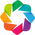

:Overlay
   .Scatter.I :Scatter   [x]   (y)
   .Curve.I   :Curve   [x]   (y)

In [34]:
import holoviews as hv
import pandas as pd
from numpy.polynomial.polynomial import Polynomial
hv.extension('bokeh')

# load and prep data
data = pd.read_csv('data/anscombes_quartet.csv')
data.columns = pd.MultiIndex.from_product([['I', 'II', 'III', 'IV'], ['x', 'y']])
# create linear regression for first subset
fitted = Polynomial.fit(data['I'].x, data['I'].y, 1) # 1 is first degree polynomial
# fitted is a function that takes x values 
xs = np.array(data['I'].x)  # WE MUST USE NUMPY ARRAY. 
ys = fitted(xs)

# scatter points and plot linear regression
scatter = hv.Scatter(data['I']).opts(size=5)
curve = hv.Curve({'x': xs, 'y':ys}).opts(color='red')
(scatter * curve).opts(height=480, width=700, show_grid=True, title="Anscombe's Quartet; Dataset I")

In [35]:
fitted.coef


array([7.50090909, 2.50045455])

- C0 = 7.50090909
- C1 = 2.50045455

These coefficients are for a polynomial of the form:

$$
p(x) = c_{0} + c_{1}x + c_{2}x^{2} + ...
$$

### Where Linear Corrleation & Fitting Does Not Work

As mentioned, there are times when computing the correlation for a data set does not make sense. We are going to take a quick look at some examples of when we want to avoid looking at correlation and linear trends.

## Nonlinear Data - <span style="color:'red'">The Polynomial.fit() does not work with NonLinear data </span>

As correlation is a linear statistic, it is not applicable to use for non-linear data. This does not mean the variables being assessed are not correlated or related in some way, just that we cannot quantify that relationship with the methods learned. Consider quadratic data and its trendline:

In [37]:
# create non-linear data
quadratic = pd.DataFrame({
    'x': np.linspace(-5,5,25)
})
quadratic['y'] = quadratic.x**2

# create linear regresison
fitted = Polynomial.fit(quadratic.x, quadratic.y, 1)

# plot data with linear regression
scatter = hv.Scatter(quadratic).opts(size=5)
curve = hv.Curve({'x': quadratic.x, 'y':fitted(quadratic.x)}).opts(color='red')
(scatter * curve).opts(height=480, width=700, show_grid=True, title='Poor Linear Regression: Quadratic Data')


:Overlay
   .Scatter.I :Scatter   [x]   (y)
   .Curve.I   :Curve   [x]   (y)

The trend line asserts that there is no variability within the data (slope == 0). Now let's compute Pearson's Correlation Coefficient:

In [80]:
r = np.corrcoef(quadratic.x, quadratic.y)
r

array([[1.000000e+00, 1.291734e-16],
       [1.291734e-16, 1.000000e+00]])

Here we have a coefficient that is essentially 0, though there very well could be a relationship at work here (one that just is not linear!)

#### Small Sample Sizes

This one is applicable to more than just linear correlation - any sample size that is too small is hard to use to draw meaningful conclusions. Consider the following contrived dataset:

In [81]:
# create small data
small = pd.DataFrame({
    'x': [1.0, 2.2, 3.8],
    'y': [0.5, 2.2, 2.3]
})

# create linear regresison
fitted = Polynomial.fit(small.x, small.y, 1)

# plot data with linear regression
scatter = hv.Scatter(small).opts(size=10)
curve = hv.Curve({'x': small.x, 'y':fitted(small.x)}).opts(color='red')
(scatter * curve).opts(height=480, width=700, show_grid=True, title='Poor Linear Regression: Small Data')

:Overlay
   .Scatter.I :Scatter   [x]   (y)
   .Curve.I   :Curve   [x]   (y)

Now let's compute Pearson's Correlation Coefficient:

In [82]:
r = np.corrcoef(small.x, small.y)
r

array([[1.        , 0.84913849],
       [0.84913849, 1.        ]])

With our limited data we are told that there is a strong correlation between our variables, but 3 data points is hardly enough to really understand the data. A single additional data point that is within the range of our current data could greatly swing our correlation coefficient in either direction.

#### Clusters of Data

Our data may consist of various clusters of points - these clusters themselves may or may not have trends within, but collectively may show a trend altogether that may be misleading:

In [45]:
np.concatenate([np.random.uniform(0.0, 0.5, 25), np.random.uniform(5.0, 5.5, 25)])

array([0.33183806, 0.13323939, 0.06388954, 0.08094246, 0.06134372,
       0.00918579, 0.28725678, 0.0431894 , 0.45160589, 0.49003099,
       0.23701012, 0.05181443, 0.31639057, 0.10209392, 0.06560864,
       0.28594129, 0.15635955, 0.34845634, 0.02598629, 0.15844335,
       0.32983265, 0.15947904, 0.0126969 , 0.13562955, 0.39938682,
       5.39254675, 5.42580007, 5.09621377, 5.01882096, 5.31695315,
       5.15750825, 5.00672006, 5.23470985, 5.10964387, 5.24524986,
       5.16079943, 5.33085579, 5.12618885, 5.39710809, 5.17656093,
       5.48283529, 5.44436998, 5.4041668 , 5.1181251 , 5.01850801,
       5.1194299 , 5.26392745, 5.34832651, 5.23776162, 5.25537308])

In [66]:
# create clusters of data
clusters = pd.DataFrame({
    'x': np.concatenate([np.random.uniform(0.0, 0.5, 25), np.random.uniform(5.0, 5.5, 25)]),
    'y': np.concatenate([np.random.uniform(0.0, 0.5, 25), np.random.uniform(5.0, 5.5, 25)]),
})
# create linear regresison
fitted = Polynomial.fit(clusters.x, clusters.y, 1)

# plot data with linear regression
scatter = hv.Scatter(clusters).opts(size=5)
curve = hv.Curve({'x': clusters.x, 'y':fitted(clusters.x)}).opts(color='red')
(scatter * curve).opts(height=480, width=700, show_grid=True, title='Poor Linear Regression: Clustered Data')

:Overlay
   .Scatter.I :Scatter   [x]   (y)
   .Curve.I   :Curve   [x]   (y)

In [84]:
r = np.corrcoef(clusters.x, clusters.y)
r

array([[1.        , 0.99656904],
       [0.99656904, 1.        ]])

There appears to be a very strong correlation here in our data, but it is likely more useful to evaluate the individual clusters. 

In [70]:
# create clusters of data
clusters = pd.DataFrame({
    'x': np.concatenate([np.random.uniform(0.0, 0.5, 25), np.random.uniform(5.0, 5.5, 25)]),
    'y': np.concatenate([np.random.uniform(0.0, 0.5, 25), np.random.uniform(5.0, 5.5, 25)]),
})
# create linear regresison
fitted_1 = Polynomial.fit(clusters.iloc[:25].x, clusters.iloc[:25].y, 1)
fitted_2 = Polynomial.fit(clusters.iloc[25:].x, clusters.iloc[25:].y, 1)

scatter = hv.Scatter(clusters).opts(size=5)
curve_1 = hv.Curve({'x': clusters.iloc[:25].x, 'y':fitted_1(clusters.iloc[:25].x)}).opts(color='red')
curve_2 = hv.Curve({'x': clusters.iloc[25:].x, 'y':fitted_2(clusters.iloc[25:].x)}).opts(color='red')

(scatter * curve_1 * curve_2).opts(height=480, width=700, show_grid=True, title='Better Linear Regression: Individual Clusters')

:Overlay
   .Scatter.I :Scatter   [x]   (y)
   .Curve.I   :Curve   [x]   (y)
   .Curve.II  :Curve   [x]   (y)

In [71]:
r = np.corrcoef(clusters.iloc[:25].x, clusters.iloc[:25].y)
r


array([[1.       , 0.1409302],
       [0.1409302, 1.       ]])

In [72]:
r = np.corrcoef(clusters.iloc[25:].x, clusters.iloc[25:].y)
r

array([[ 1.      , -0.153989],
       [-0.153989,  1.      ]])

#### Outliers

Outliers in data can greatly skew measures of correlation within a data set.

In [89]:
# create clusters of data
outlier = pd.DataFrame({
    'x': np.random.uniform(0.0, 0.5, 25),
    'y': np.random.uniform(0.0, 0.5, 25),
})
outlier.iloc[-1] = [5.0, 5.0]

# create linear regresison
fitted = Polynomial.fit(outlier.x, outlier.y, 1)

# plot data with linear regression
scatter = hv.Scatter(outlier).opts(size=5)
curve = hv.Curve({'x': outlier.x, 'y':fitted(outlier.x)}).opts(color='red')
(scatter * curve).opts(height=480, width=700, show_grid=True, title='Poor Linear Regression: Outliers')

:Overlay
   .Scatter.I :Scatter   [x]   (y)
   .Curve.I   :Curve   [x]   (y)

#### This graph shows that due to the outlier, we are getting a wrong linear regression function

In [90]:
r = np.corrcoef(outlier.x, outlier.y)
r

array([[1.        , 0.97215251],
       [0.97215251, 1.        ]])

Again our trendline and correlation coefficient indicate a strong relation in the data, but the single outlier at `(5.0, 5.0)` is skewing our assessment of the data. If we strip that value from our data, we see that there is not much to our data.

### Here we have removed the above outliers, so that we have a better regression model
### We also need to understand if we can remove the outliers or not.


In [91]:
# remoec the outlier
outlier_removed = outlier.iloc[:-1]

# create linear regresison
fitted = Polynomial.fit(outlier_removed.x, outlier_removed.y, 1)

# plot data with linear regression
scatter = hv.Scatter(outlier_removed).opts(size=5)
curve = hv.Curve({'x': outlier_removed.x, 'y':fitted(outlier_removed.x)}).opts(color='red')
(scatter * curve).opts(height=480, width=700, show_grid=True, title='Better Linear Regression: Outlier Removed')

:Overlay
   .Scatter.I :Scatter   [x]   (y)
   .Curve.I   :Curve   [x]   (y)

In [92]:
r = np.corrcoef(outlier_removed.x, outlier_removed.y)
r

array([[ 1.        , -0.14002729],
       [-0.14002729,  1.        ]])

This is a much more accurate representation of our data! However, it is worth noting that outliers in data are not necessarily bad. There very well could be something in your model or system that behaves outlandish under certain criteria, and while it may make some statistical operations and observations worse/less conclusive, it is always best to understand the reasons behind any and all outliers!

## Exercise

Below we have some noisy data artificially representing radar measurements of a cannonball. Create a second-degree polynomial fit of the data to estimate the true path of the cannonball!

In [93]:
# simulate noisy data
x = np.linspace(0, 10.0, 100)
y = 49.05*x - 4.905 * x * x + np.random.normal(0.0, 5.0, 100)
measurements = pd.DataFrame({'x':x, 'y':y})

# plot noisy data
scatter = hv.Scatter(measurements).opts(size=5)
scatter.opts(show_grid=True, height=480, width=700)

:Scatter   [x]   (y)

In [101]:
# implement and visualize the fit here!
# simulate noisy data
fitted = Polynomial.fit(measurements.x, measurements.y, 2)  # Since this is not linear regression, this is polynomial with degree 2 
scatter = hv.Scatter(measurements).opts(size=5)
curve = hv.Curve({'x': measurements.x, 'y':fitted(measurements.x)}).opts(color='red')
(scatter * curve).opts(height=480, width=700, show_grid=True, title='')


:Overlay
   .Scatter.I :Scatter   [x]   (y)
   .Curve.I   :Curve   [x]   (y)